In [2]:
import numpy as np 
import random
from qiskit.quantum_info import Statevector
import pennylane as qml
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta,wires=0)
    ##################

    return qml.state()

# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

#plot = plotter(angles, output_states) 

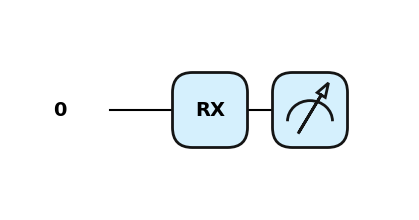

In [4]:
circuit = qml.QNode(apply_rx, dev)
qml.drawer.use_style("pennylane")
result = qml.draw_mpl(circuit)(angles,0)
plt.show()